In [9]:
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm, trange
import seaborn
import matplotlib.pyplot as plt
import os

In [5]:
curr_run_fname = '/oak/stanford/orgs/kipac/aemulus/aemulus_nu/Box0_1400/'
rockstar_dir = curr_run_fname+'output/rockstar/'

In [6]:
f = open(rockstar_dir+'savelist.txt', 'r')
savelist = f.read().split()
f.close()

N_snapshots = len(savelist)

In [27]:
mass_data = []
for i in range(N_snapshots):
    print('On snapshot %d of %d'%(i+1, N_snapshots))
    f = open(rockstar_dir+'out_%d.list'%(i), 'r')
    cols = f.readline()[1:].split()
#     TMP = 0
    c_data = []
    for line in tqdm(f):
#         TMP+=1
#         if(TMP==250000):
#             break
        if(line[0]=='#'):
            continue
        assert(len(cols) == len(line.split()))
        current_halo_properties = dict(zip(cols, line.split()))
        c_data += [eval(current_halo_properties['M200b'])]
    mass_data += [c_data]
    f.close()
# mass_data = np.array(mass_data)

On snapshot 1 of 16


2563627it [00:31, 80444.07it/s]


On snapshot 2 of 16


4826339it [00:59, 80448.56it/s]


On snapshot 3 of 16


7226883it [01:29, 80466.67it/s]


On snapshot 4 of 16


8301780it [01:43, 80483.54it/s]


On snapshot 5 of 16


9968382it [02:03, 80713.31it/s]


On snapshot 6 of 16


10273177it [02:02, 84087.14it/s]


On snapshot 7 of 16


10533335it [02:11, 80282.68it/s]


On snapshot 8 of 16


10748029it [02:13, 80281.93it/s]


On snapshot 9 of 16


10925160it [02:15, 80589.87it/s]


On snapshot 10 of 16


11062538it [02:17, 80425.61it/s]


On snapshot 11 of 16


11157743it [02:19, 79957.27it/s]


On snapshot 12 of 16


11260836it [02:20, 80132.10it/s]


On snapshot 13 of 16


11258228it [02:20, 80169.10it/s]


On snapshot 14 of 16


11173377it [02:18, 80507.84it/s]


On snapshot 15 of 16


11040427it [02:17, 80047.24it/s]


On snapshot 16 of 16


10960506it [02:17, 79514.96it/s]


/tmp/ipykernel_157040/768580622.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(bin_cnters[not0], N[not0], c=color)


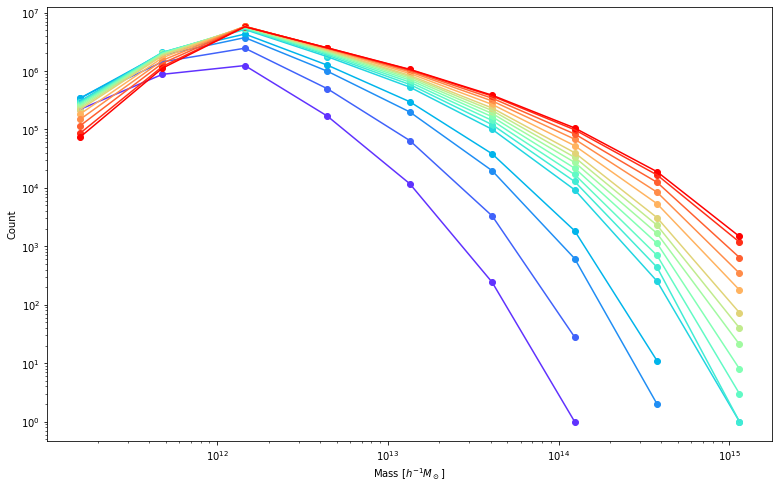

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,8))

for i in range(len(mass_data)):
    snapshot_mass = mass_data[i]
    nBins = 10
    edges = np.logspace(np.log10(.9e11), np.log10(2e15), nBins, 10.)
    color = plt.colormaps["rainbow"]((i+1)/len(mass_data))
    N, bin_edge, bin_idx = binned_statistic(snapshot_mass, np.ones_like(snapshot_mass), 
                                            statistic='count', bins=edges)
    bin_cnters = np.array([np.sqrt(bin_edge[i]*bin_edge[i+1]) for i in range(len(bin_edge)-1)])
    
    not0 = np.where(N>0)
    ax.plot(bin_cnters[not0], N[not0], c=color)
    ax.scatter(bin_cnters[not0], N[not0], c=color)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Mass $[h^{-1}M_\odot]$')
ax.set_ylabel(r'Count')

plt.savefig('figures/'+curr_run_fname.split('/')[-2]+'_NvsM_py_process.pdf', bbox_inches='tight')

0it [00:00, ?it/s]/tmp/ipykernel_178330/1349738901.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(bin_cnters[not0], N[not0], c=color)
16it [00:43,  2.73s/it]


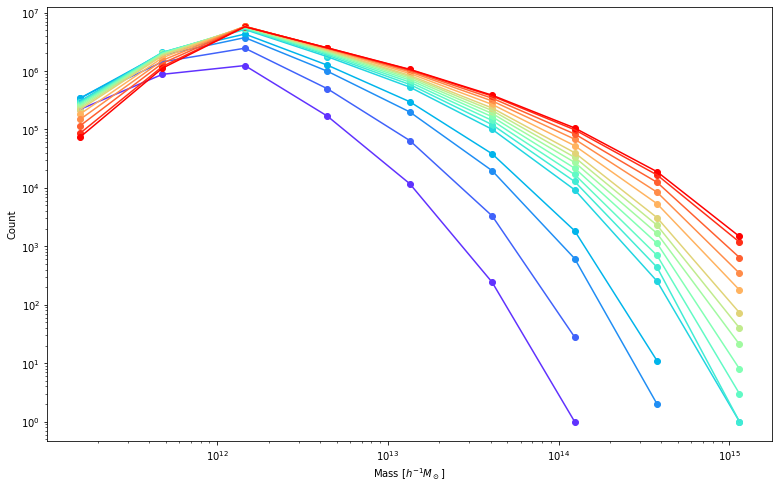

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,8))
i=0

f = open('/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+curr_run_fname.split('/')[-2]+'_M200b', 'r')
for line in tqdm(f):
    snapshot_mass = line.strip().split()
    snapshot_mass = np.array(snapshot_mass, dtype=np.float64)
    nBins = 10
    edges = np.logspace(np.log10(.9e11), np.log10(2e15), nBins, 10.)
    color = plt.colormaps["rainbow"]((i+1)/N_snapshots)
    N, bin_edge, bin_idx = binned_statistic(snapshot_mass, np.ones_like(snapshot_mass), 
                                            statistic='count', bins=edges)
    bin_cnters = np.array([np.sqrt(bin_edge[i]*bin_edge[i+1]) for i in range(len(bin_edge)-1)])
    
    not0 = np.where(N>0)
    ax.plot(bin_cnters[not0], N[not0], c=color)
    ax.scatter(bin_cnters[not0], N[not0], c=color)
    i+=1
f.close()

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Mass $[h^{-1}M_\odot]$')
ax.set_ylabel(r'Count')

plt.savefig('figures/'+curr_run_fname.split('/')[-2]+'_NvsM_cpp_process.pdf', bbox_inches='tight')